<center><h1>INFO 7390: Assignment 1</h1></center>

<h3><b>Name:</b> Aniket Mirajkar</h3>
<h3><b>NU ID:</b> 001563245</h3>

# Abstract

In this notebook, I have building a single neuron neural network i.e. logistic regression unit along with log loss for evaluating the loss and gradient descent for optimizing the weight and bias. I have made use of Sigmoid and ReLu activation functions to study their impact on the Gender classification dataset from Kaggle. I have also implemented regularization using the L1 (Lasso) method and L2 (Ridge) method. The dataset can be found at below link:

https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset








In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import math
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
url = 'https://raw.githubusercontent.com/mirajkarani/INFO_7390/master/gender_classification_v7.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
#Encoding the labels to categorical values
df.gender = df.gender.astype('category').cat.codes

In [5]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

As we can see above, the dataset does not contain any null values and the values for the columns are either in floating point range or categorical (0,1) in nature.

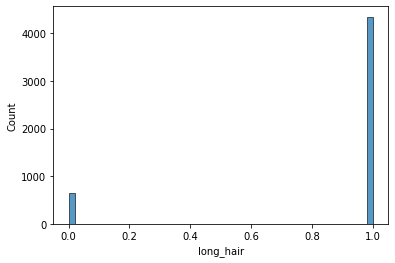

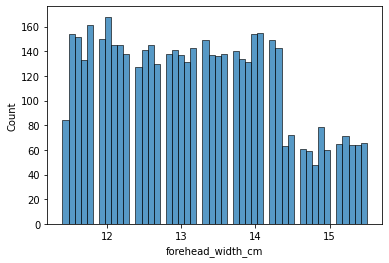

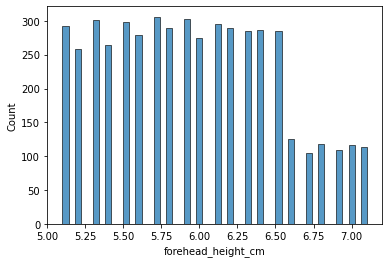

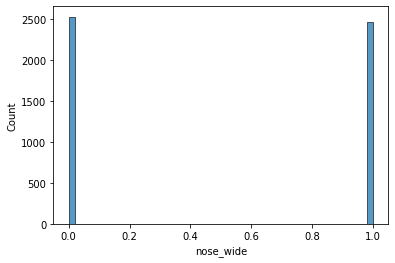

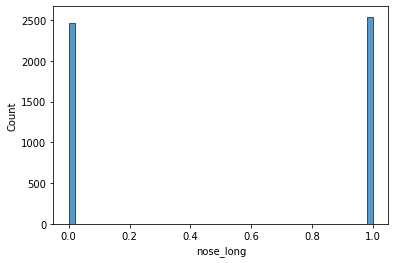

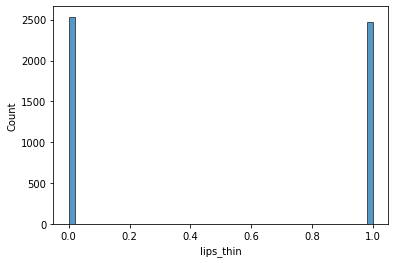

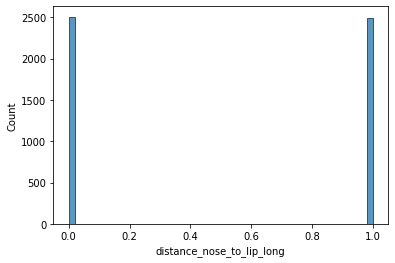

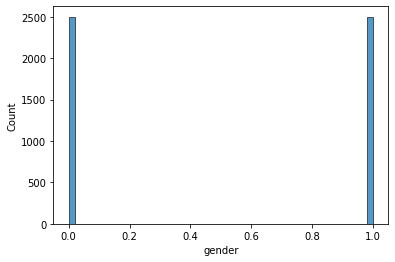

In [6]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col],bins=50)

# Train-test split

Below I have split the dataset into training and testing sets and converted it to numpy arrays for further processing.

In [7]:
#Creating a train-test split
size = int(0.8 * len(df))

train_set = df[:size]
test_set = df[size:]

In [8]:
#Separating labels and predictor variables
y_train = train_set[['gender']]
X_train = train_set.drop('gender', 1)

y_test = test_set[['gender']]
X_test = test_set.drop('gender', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [9]:
print(X_train.shape)
print(y_train.shape)

(4000, 7)
(4000, 1)


In [10]:
#Converting dataframe into numpy array
y_train = np.array(y_train)
X_train = X_train.to_numpy()

y_test = np.array(y_test)
X_test = X_test.to_numpy()

In [11]:
#Defining the initial weights and bias
weight = np.zeros(X_train.shape[1])
bias = 0

# Building the logistic regression model with Sigmoid activation function

The sigmoid function is denoted as follows: 


<center>σ(x)  =  1 / (1 + e^(-x))</center>


The sigmoid function squeezes the values between (0 to 1) and hence, it is especially useful for models used for predicting the probabilities as the output. Hence, sigmoid function provides a good estimation in logistic regression as the outcome is a probability in the range [0,1].

In [12]:
#Defining the sigmoid function 
def Sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [13]:
loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = Sigmoid(np.dot(X_train[i],weight) + bias) 
    y = y_train[i]
    loss += np.multiply(np.log(y_pred), y) + np.multiply(np.log(1-y_pred), 1-y)
loss = - loss/X_train.shape[1]
print(loss)

[396.08410318]


In [14]:
# Defining the accuracy metrics 
def accuracy_metrics(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if (actual[i]>0.5) == (predicted[i]>0.5):
            correct += 1
    return correct / float(len(actual)) * 100.0

In [15]:
# Defining the training hyperparameters
max_epoch = 100
learning_rate = 0.01
Training_data = {"trainLoss":[],"testLoss":[],"trainAccuracy":[],"testAccuracy":[]}

In [16]:
def fit_train():
    y_pred = []
    loss = 0
    for i in range(X_train.shape[0]):
        y_pred_temp = Sigmoid(np.dot(X_train[i],weight) + bias)        
        loss += np.multiply(np.log(y_pred_temp), y_train[i])+ np.multiply(np.log(1-y_pred_temp), 1-y_train[i]) 
        y_pred.append(y_pred_temp)
    loss = -loss/X_train.shape[1]
    
    return y_pred, loss

In [17]:
def fit_test():
    y_pred_test = []
    loss_test = 0
    for i in range(X_test.shape[0]):
        y_pred_temp = Sigmoid(np.dot(X_test[i],weight)+bias)        
        loss_test += -(np.multiply(np.log(y_pred_temp), y_test[i])+ np.multiply(np.log(1-y_pred_temp), 1-y_test[i]))
        y_pred_test.append(y_pred_temp)    
        
    return y_pred_test, loss_test

In [18]:
def update_bias(bias):
    grad_bias = 0
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) #dJ/db
        for j in range(len(weight)):
            grad_w[j] += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i])*(X_train[i][j])

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias

In [19]:
def update_weight(): 
    for j in range(len(weight)):
        weight[j] = weight[j] - grad_w[j]*learning_rate/X_train.shape[0]
    
    return weight

In [20]:
for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%10==0:
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

Training loss:396.084103
Test loss:0.346574
Training accuracy: 49.875000
Validation accuracy: 50.549451
Training loss:393.944447
Test loss:0.344840
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:392.095567
Test loss:0.343244
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:390.277239
Test loss:0.341648
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:388.474409
Test loss:0.340059
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:386.686049
Test loss:0.338482
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:384.911997
Test loss:0.336916
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:383.152165
Test loss:0.335364
Training accuracy: 73.650000
Validation accuracy: 74.225774
Training loss:381.406482
Test loss:0.333824
Training accuracy: 79.200000
Validation accuracy: 80.419580
Training loss:379.674876
Test loss:0.332296
Training accuracy: 7

# Analyzing the accuracy and f1 score of the model

We can see that the logistic regression model which we have built performs very well with validation accuracy of 80.42% and F1 score of 0.9.

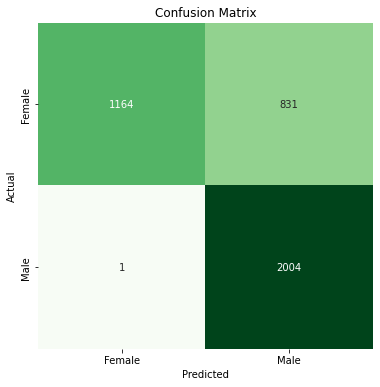

In [21]:
# Compute the confusion matrix

y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.yticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
for epoch in range(max_epoch):
  if epoch%100 == 0:  
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))

Training accuracy: 79.200000
Validation accuracy: 80.419580


In [23]:
tp = cm [0][0]
fp = cm [1][0]
tn = cm [1][1]
fn = cm [0][1]

precision = tp / (tp + fp)
recall = tp / (tp + fp)

f1 = 2 * (precision * recall) / (precision + recall)

print("F1 score: {}".format(f1,2))

F1 score: 0.9991416309012876


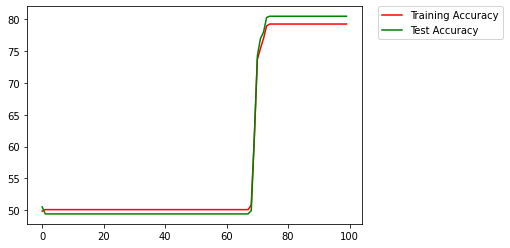

In [24]:
plt.plot(Training_data['trainAccuracy'],label='Training Accuracy',color='red')
plt.plot(Training_data['testAccuracy'],label='Test Accuracy',color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

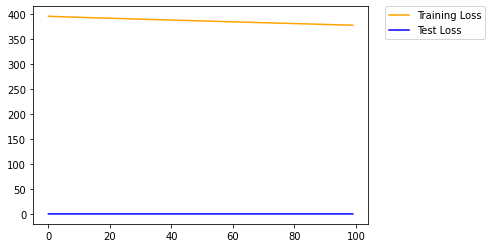

In [25]:
plt.plot(Training_data['trainLoss'],label='Training Loss',color='orange')
plt.plot(Training_data['testLoss'],label='Test Loss',color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Replacing the Sigmoid activation function with ReLu

Rectified Linear Units or ReLu is one of the most widely used activation functions as it solves the vanishing gradient problem which plagues the sigmoid function. It returns 0 if it receives any negative input, but for any positive value x, it returns that value back.

ReLu function is denoted as follows:

<center>f(x) = max(0,x)</center>

In [26]:
def ReLu(x):
    return max(0.0, x)

In [27]:
loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = ReLu(np.dot(X_train[i],weight) + bias)
    y = y_train[i]
    loss += (y - y_pred)*(y - y_pred)
loss = loss/2

In [28]:
def fit_train_relu():
    y_pred = []
    loss = 0
    for i in range(X_train.shape[0]):
        y_pred_temp = ReLu(np.dot(X_train[i],weight) + bias)        
        loss += (y_train[i] - y_pred_temp)*(y_train[i] - y_pred_temp) 
        y_pred.append(y_pred_temp)
    loss = loss/(2 * X_train.shape[0])
    
    return y_pred, loss

In [29]:
def fit_test_relu():
    y_pred_test = []
    loss_test = 0
    for i in range(X_test.shape[0]):
        y_pred_temp = ReLu(np.dot(X_test[i],weight)+bias)        
        loss_test += (y_test[i] - y_pred_temp)*(y_test[i] - y_pred_temp) 
        y_pred_test.append(y_pred_temp) 
    return y_pred_test, loss_test

In [30]:
#Training the neural network with relu activation function
max_epoch = 50

for epoch in range(max_epoch):

  y_pred, loss = fit_train_relu()
  y_pred_test, loss_test = fit_test_relu()
        
  loss_test = loss_test/(2*X_test.shape[0])
  trainAcc = accuracy_metrics(y_train,y_pred)
  testAcc = accuracy_metrics(y_test,y_pred_test)
    
  Training_data["trainLoss"].append(loss)
  Training_data["testLoss"].append(loss_test)
  Training_data["trainAccuracy"].append(trainAcc)
  Training_data["testAccuracy"].append(testAcc)
    
    
  if epoch%10==0:
    print("Training loss:%f" %(loss))
    print("est loss:%f" %(loss_test))
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))
        
  y_pred = np.array(y_pred)  
  grad_w, bias = update_bias(bias)
  weight = update_weight()

Training loss:0.191798
est loss:0.189743
Training accuracy: 49.875000
Validation accuracy: 50.549451


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Training loss:0.087560
est loss:0.087069
Training accuracy: 96.425000
Validation accuracy: 97.302697
Training loss:0.085557
est loss:0.085057
Training accuracy: 96.450000
Validation accuracy: 97.302697
Training loss:0.083624
est loss:0.083114
Training accuracy: 96.425000
Validation accuracy: 97.302697
Training loss:0.081758
est loss:0.081238
Training accuracy: 96.350000
Validation accuracy: 97.202797


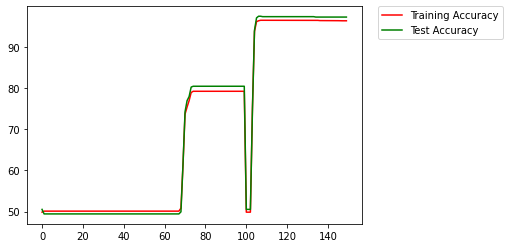

In [31]:
plt.plot(Training_data['trainAccuracy'],label='Training Accuracy',color='red')
plt.plot(Training_data['testAccuracy'],label='Test Accuracy',color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

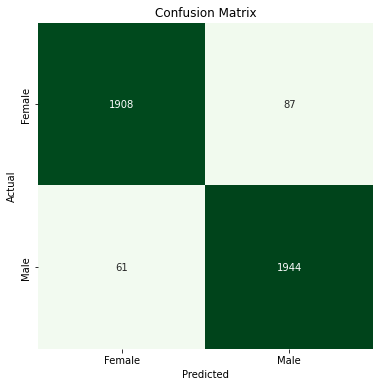

In [32]:
y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.yticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
for epoch in range(max_epoch):
  if epoch%50 == 0:  
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))

Training accuracy: 96.300000
Validation accuracy: 97.202797


In [34]:
tp = cm [0][0]
fp = cm [1][0]
tn = cm [1][1]
fn = cm [0][1]

precision = tp / (tp + fp)
recall = tp / (tp + fn)

f1 = 2 * (precision * recall) / (precision + recall)

print("F1 score: {}".format(round(f1,2)))

F1 score: 0.96


# Adding L1 (Lasso) and L2 (Ridge) Regression to the model

I have tested the model with varying ranges of learning rate, epochs as well as l1 and l2 penalties and we can see that there is significant drop in model performance upon applying the ridge and lasso regression to the model. 

In [35]:
weight = np.zeros(X_train.shape[1])
bias = 0

In [36]:
def update_bias(bias):
    grad_bias = 0
    l1_penality = 0.05
    a,b = X_train.shape
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) 
        for j in range(len(weight)):
            if grad_w[j] > 0:
              grad_w[j] += (-(2*(X_train[i][j])*(y_train[i] - y_pred[i])) + l1_penality)/a
            else:
              grad_w[j] += (-(2*(X_train[i][j])*(y_train[i] - y_pred[i]) ) - l1_penality )/a

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias

In [37]:
max_epoch = 100
learning_rate = 0.001
for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%100 == 0:
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

Training loss:396.084103
Test loss:0.346574
Training accuracy: 49.875000
Validation accuracy: 50.549451


In [38]:
weight = np.zeros(X_train.shape[1])
bias = 0

In [39]:
def update_bias(bias):
    grad_bias = 0
    l2_penality = 0.001
    a,b = X_train.shape
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) 
        for j in range(len(weight)):
            grad_w[j] += -(2*(X_train[i][j])*(y_train[i] - y_pred[i]) + (2*l2_penality*weight[j]))/a 

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias

In [40]:
max_epoch = 100

for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%100 == 0:
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

Training loss:396.084103
Test loss:0.346574
Training accuracy: 49.875000
Validation accuracy: 50.549451


# Conclusion

The logistic regression model performs well for the sigmoid activation function with an accuracy of 80.42% and f-1 score of 0.9. I have also implemented relu activation function for the model in place of sigmoid which provided positive outcome for the model evaluation. More exploratory analysis is required for finding the optiumum values of l1 and l2 regularization for improving the model performance.

MIT License

Copyright (c) 2022 Aniket Mirajkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.